In [125]:
import fastf1 as ff1
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import re

In [3]:
ff1.Cache.enable_cache('../cache')
ff1.plotting.setup_mpl()

In [4]:
year, event, event_type = 2023, 'Australia', 'R'
session = ff1.get_session(year, event, event_type)
session.load()
#session.results.iloc[0:15].loc[:, ['Abbreviation', 'Q2']]

core           INFO 	Loading data for Australian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = 

In [96]:
driver_1 = 'RUS'
laps_driver_1 = session.laps.pick_driver(driver_1)
lap_18 = laps_driver_1.loc[laps_driver_1['LapNumber'] == 18]
idk_mate = laps_driver_1.loc[laps_driver_1['LapNumber'] == 17]
idk_mate.append(lap_18)
#idk_mate = laps_driver_1.pick_fastest()
telemetry = idk_mate.get_telemetry().add_distance()
distance_min, distance_max = 4100, 5300
team_color = str(idk_mate['Team'])

# for speed in telemetry['Speed']:
#     print(speed)

C:\Users\Ricky\AppData\Local\Temp\ipykernel_5132\1888876334.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idk_mate.append(lap_18)
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i

In [126]:
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} \n RUSSELL Incident"
plot_ratios = [2, 2, 2, 2]
plot_filename = re.sub(r'\W+', '', plot_title.replace("\n", " ")) + ".png"

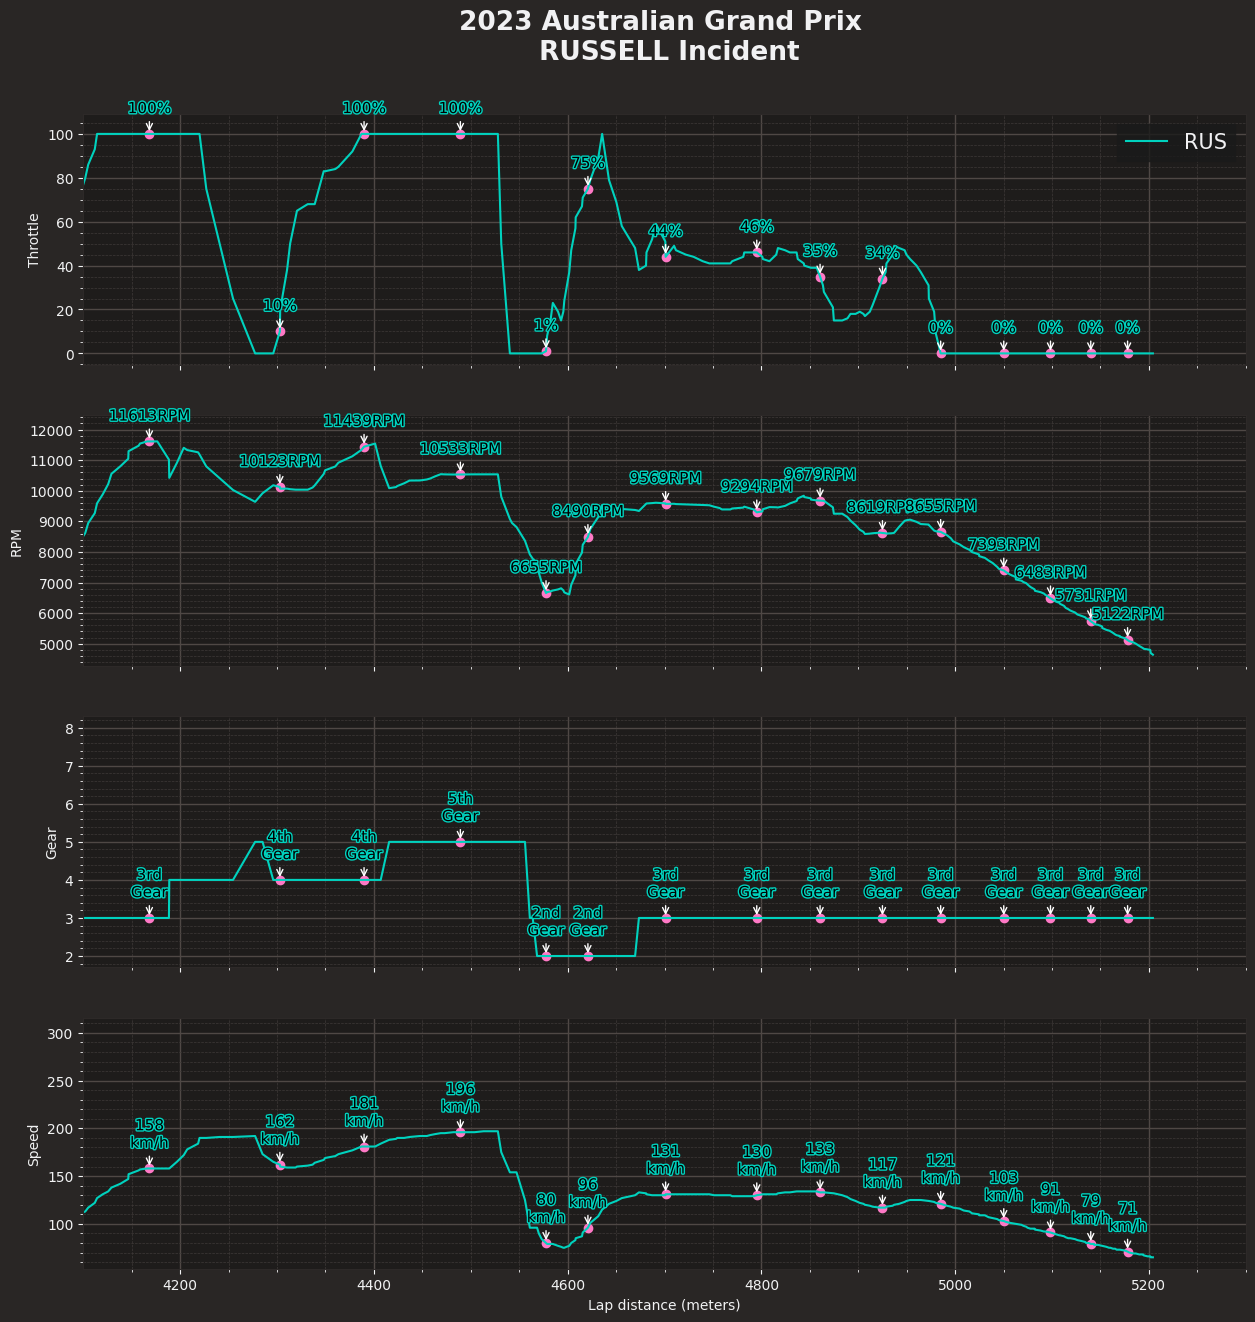

In [127]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(4, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].set_title(plot_title, y=1.15, fontweight='bold')

ax[3].plot(telemetry['Distance'], telemetry['Speed'], label=driver_1, color=ff1.plotting.team_color(team_color))
ax[3].set(ylabel='Speed')

# Find ever nTH entry in panda DataFrame
every_nTH_entry = telemetry.iloc[::15]
#print(telemetry.iloc[:1])

# Plot every nTH entry as scatter points on top of the line plot
ax[3].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['Speed'].to_numpy(), marker='o')

# Annotate every nTH entry
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['Speed']
    text = f'{y_coord}\nkm/h'
    ax[3].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=11, color='black', arrowprops=dict(edgecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=2, foreground=ff1.plotting.team_color(team_color))])

ax[0].plot(telemetry['Distance'], telemetry['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_color))
ax[0].set(ylabel='Throttle')
ax[0].legend(loc="upper right", prop={'size': 15})
ax[0].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['Throttle'].to_numpy(), marker='o')
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['Throttle']
    text = f'{y_coord}%'
    ax[0].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=11, color='black', arrowprops=dict(edgecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=2, foreground=ff1.plotting.team_color(team_color))])

ax[2].plot(telemetry['Distance'], telemetry['nGear'], label=driver_1, color=ff1.plotting.team_color(team_color))
ax[2].set(ylabel='Gear')
ax[2].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['nGear'].to_numpy(), marker='o')
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['nGear']
    if y_coord == 1:
        text = f'{y_coord}st\nGear'
    elif y_coord == 2:
            text = f'{y_coord}nd\nGear'
    elif y_coord == 3:
        text = f'{y_coord}rd\nGear'
    else:
        text = f'{y_coord}th\nGear'
    ax[2].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=11, color='black', arrowprops=dict(edgecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=2, foreground=ff1.plotting.team_color(team_color))])


ax[1].plot(telemetry['Distance'], telemetry['RPM'], label=driver_1, color=ff1.plotting.team_color(team_color))
ax[1].set(ylabel='RPM')
ax[1].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['RPM'].to_numpy(), marker='o')
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['RPM']
    text = f'{y_coord}RPM'
    ax[1].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=11, color='black', arrowprops=dict(edgecolor='white', arrowstyle='->')).set_path_effects([pe.withStroke(linewidth=2, foreground=ff1.plotting.team_color(team_color))])


ax[3].set(xlabel='Lap distance (meters)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
for i in range(4):
    ax[i].set_xlim(left=distance_min, right=distance_max)
plt.savefig(plot_filename, dpi=300)
plt.show()